# Assignment 2. Rheological behaviour of cosmetic creams

It is a sample of rheological behaviour of some cosmetic creams, taken from [here](https://www.rheologylab.com/articles/emulsion-stability/)

![image.png](CSVP-of-Lotions-and-Creams-names-removed.webp)

What conclusions would you get from that about the behaviour of day creams in front of body creams? 

Let's consider the case of the body lotion C. Fit the Power Law model, get coefficients and plot it. You will see that it is not good. You will see that it does not agree with very low (_zero-shear rate viscosity_) or high (_infinity-shear rate viscosity_) shear stress. There are some other models that deals with this behaviour. The molt usual is the [Carreau model](https://en.wikipedia.org/wiki/Carreau_fluid). Apply this law to obtain a more accurate model of this fluid and discuss it.


## Day creams and Body lotions behaviour 
The behaviour of day creams shows a critical stress under which they suddenly lose their viscousness. This is in contrast to body lotions which show a gradual descent of viscosity. As both of them decrease viscosity with increased shear stress, they can be considered shear-thinning fluids. This behaviour can be explained because day creams are applied in dry conditions, usually to the face where it needs not to fall. In contrast body lotions are normally applied during the shower, needing less viscosity to remain on the skin.


First different modules are imported:

In [114]:
try:
    import statsmodels.api as sm
except:
    !pip install statsmodels
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize as opt

Next, data is read into arrays to operate it. 

In [115]:
[xBLA,yBLA] = np.loadtxt("BodyLotionA.csv",delimiter=',').T # It's important the names for the columns data
[xBLB,yBLB] = np.loadtxt("BodyLotionB.csv",delimiter=',').T
[xBLC,yBLC] = np.loadtxt("BodyLotionC.csv",delimiter=',').T
[xDCA,yDCA] = np.loadtxt("DayCreamA.csv",delimiter=',').T
[xDCB,yDCB] = np.loadtxt("DayCreamB.csv",delimiter=',').T

Then, it is plotted to compare against the image and verify that the correct data is used.

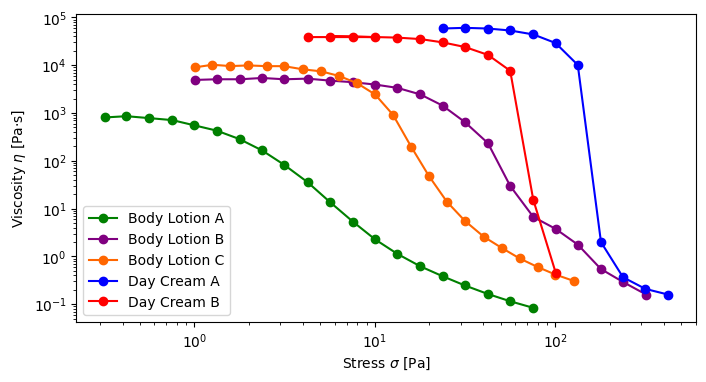

In [116]:
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(xBLA,yBLA,'o-',color=(0,0.5,0))
ax.plot(xBLB,yBLB,'o-',color=(0.5,0,0.5))
ax.plot(xBLC,yBLC,'o-',color=(1,0.4,0))
ax.plot(xDCA,yDCA,'o-',color=(0,0,1))
ax.plot(xDCB,yDCB,'o-',color=(1,0,0))
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Stress $\sigma$ [Pa]')
ax.set_ylabel(r'Viscosity $\eta$ [Pa·s]')
ax.legend(['Body Lotion A', 'Body Lotion B','Body Lotion C','Day Cream A','Day Cream B'])

## Power Law Model for Body Lotion C

The Power Law Model defines the shear stress as follows:
$$
\sigma = K\dot{\gamma}^n \tag{1}
$$

And the viscosity as:
$$
\mu(\dot{\gamma}) = K(\dot{\gamma})^{n-1} \tag{2}
$$

From Eq. (1), the shear rate can be found:
$$
\dot{\gamma} = \left(\frac{\sigma}{K}\right)^{1/n}
$$

And replacing it in Eq. (2):
$$
\mu(\dot{\gamma}) = K\left(\left(\frac{\sigma}{K}\right)^{1/n}\right)^{n-1} = K\left(\frac{\sigma}{K}\right)^\frac{n-1}{n} = \mu(\sigma)
$$

In [117]:
def func_power(sigma,K,n):
    return K*(sigma/K)**((n-1)/n)

popt, pcov = opt.curve_fit(func_power,xBLC,yBLC)
[Kres,nres] = popt

In [118]:
xdata_plot = np.logspace(0,2,22)
ydata_power = f(xdata_plot,Kres,nres)

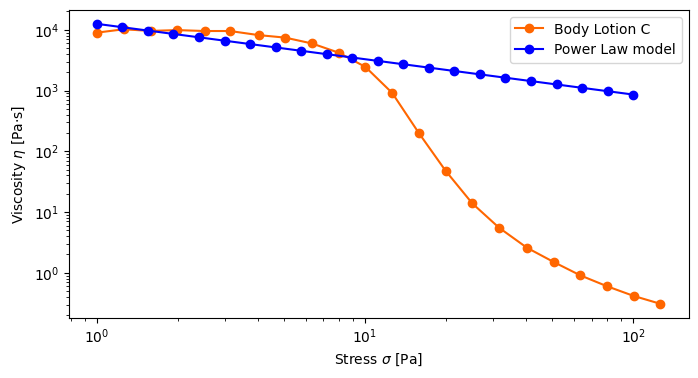

In [119]:
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(xBLC,yBLC,'o-',color=(1,0.4,0))
ax.plot(xdata_plot,ydata_power,'o-',color=(0,0,1))
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Stress $\sigma$ [Pa]')
ax.set_ylabel(r'Viscosity $\eta$ [Pa·s]')
ax.legend(['Body Lotion C', 'Power Law model'])

It can be seen that the Power Law Model does not fit correctly with the experimental values. The same is seen when representing the viscosity $\eta$ in front of the shear rate $\dot{\gamma}$ instead of the shear stress $\sigma$ (knowing that at each point $\sigma = \eta\dot{\gamma}$).

To adjust for the Carreau model, first shear rate is obtained as $$\sigma/\eta=\dot{\gamma}$$

In [120]:
shear_rate_data= np.divide(xBLC,yBLC)   # [s^-1] = stress [Pa] / viscosity [Pa·s]

### Carreau Model for Body Lotion C
Then, we will apply the Carreau model, which describes more accurately this kind of behaviours, to see whether it could be used to describe Body Lotion C's behaviour. Carreau model relates the viscosity $\mu$ with the shear rate $\dot{\gamma}$ in the following way:
$$
\mu_{eff}(\dot{\gamma}) = \mu_{inf}+(\mu_0-\mu_{inf})\left(1+(\lambda\dot{\gamma})^2\right)^\frac{n-1}{2}
$$

In [121]:
def carreau(sr,muinf,mu0,lambdat,n):
    return muinf+(mu0-muinf)*(1+(lambdat*sr)**2)**((n-1)/2)

popt, pcov = opt.curve_fit(carreau,shear_rate_data,yBLC)
[muinf,mu0,lambdat,n] = popt

In [122]:
#xdata_plot = np.logspace(0,2,10)
ydata_carreau = fC(shear_rate_data,muinf,mu0,lambdat,n)

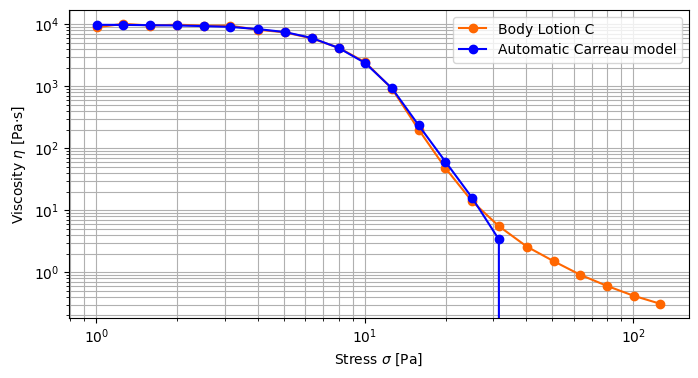

In [123]:
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(xBLC,yBLC,'o-',color=(1,0.4,0))
ax.plot(xBLC,ydata_carreau,'o-',color=(0,0,1))
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(['Body Lotion C', 'Automatic Carreau model'])
ax.set_xlabel(r'Stress $\sigma$ [Pa]')
ax.set_ylabel(r'Viscosity $\eta$ [Pa·s]')
ax.grid(True, which='both')

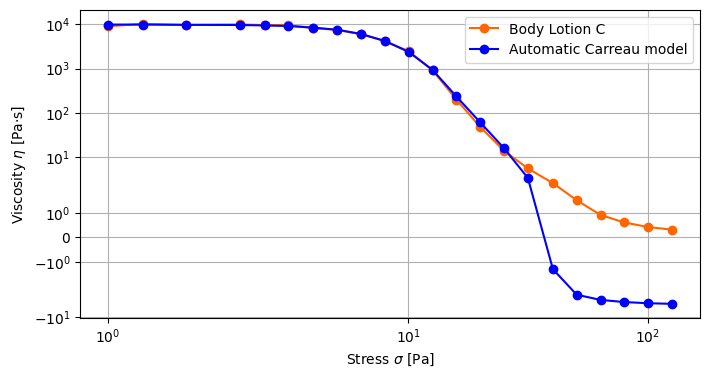

In [124]:
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(xBLC,yBLC,'o-',color=(1,0.4,0))
ax.plot(xBLC,ydata_carreau,'o-',color=(0,0,1))
ax.set_xscale('symlog')
ax.set_yscale('symlog')
ax.legend(['Body Lotion C', 'Automatic Carreau model'])
ax.set_xlabel(r'Stress $\sigma$ [Pa]')
ax.set_ylabel(r'Viscosity $\eta$ [Pa·s]')
ax.grid(True, which='both')

It can be seen that the Carreau model is quite more accurate when fitting to the behaviour of the Body Lotion C than the Power Law model. However, the Carreau model starts to diverge for stresses higher than 12 Pa, approximately, as negative values for the viscosity are pictured.

Now, we will fit $\mu_0$ and $\mu_{inf}$ manually, by the first (at zero shear rate) and last (at infinite shear rate) viscosity values, respectively, from the experimental data of Body Lotion C. This is done to avoid negative values for the viscosity.

In [125]:
mu0 = yBLC[0]
muinf = yBLC[-1]

def carreau(sr,lambdat,n):
    return muinf+(mu0-muinf)*(1+(lambdat*sr)**2)**((n-1)/2)

popt, pcov = opt.curve_fit(carreau,shear_rate_data,yBLC)
[lambdat,n] = popt

In [126]:
y_carreau2 = carreau(shear_rate_data,lambdat,n)

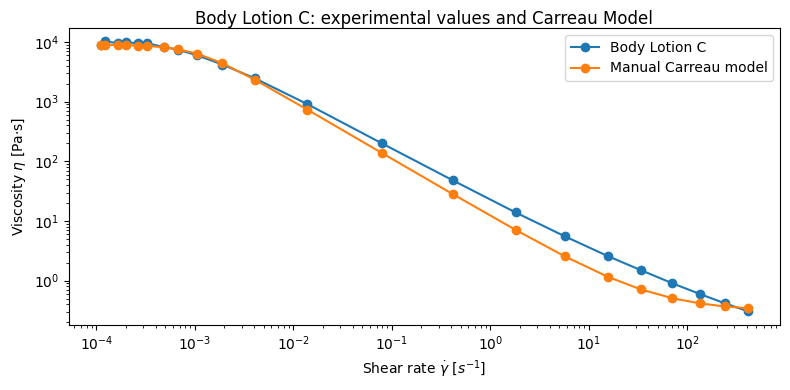

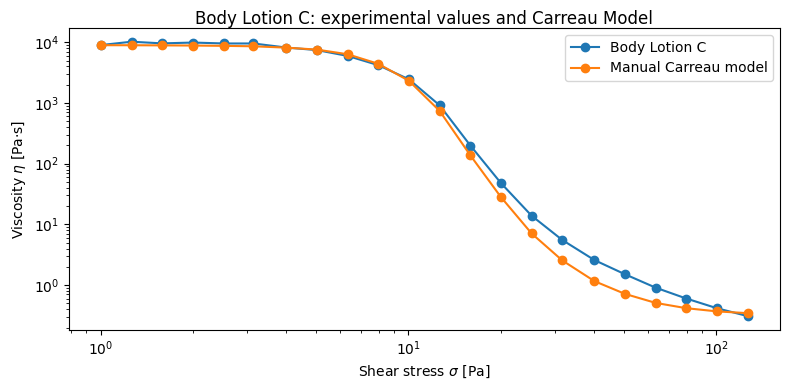

In [127]:
fig,ac = plt.subplots(figsize=(8,4))
ac.plot(shear_rate_data,yBLC,'-o')
ac.plot(shear_rate_data,y_carreau2,'-o')
ac.set_xscale('log')
ac.set_yscale('log')
ac.set_xlabel(r'Shear rate $\dot{\gamma}$ [$s^{-1}$]')
ac.set_ylabel(r'Viscosity $\eta$ [Pa·s]')
ac.set_title("Body Lotion C: experimental values and Carreau Model", va='top')
ac.legend(['Body Lotion C', 'Manual Carreau model'])
fig.tight_layout()

fig,ac = plt.subplots(figsize=(8,4))
ac.plot(xBLC,yBLC,'-o')
ac.plot(xBLC,y_carreau2,'-o')
ac.set_xscale('log')
ac.set_yscale('log')
ac.set_xlabel(r'Shear stress $\sigma$ [Pa]')
ac.set_ylabel(r'Viscosity $\eta$ [Pa·s]')
ac.set_title("Body Lotion C: experimental values and Carreau Model", va='top')
ac.legend(['Body Lotion C', 'Manual Carreau model'])
fig.tight_layout()

### Relative errors with respect to experimental data
Finally, the relative errors of each of the three regressions with respect to the experimental values of the viscosity are going to be pictured:

In [128]:
error_powerlaw = abs(100*(ydata_power-yBLC)/yBLC) # In percentage
error_carreau = abs(100*(ydata_carreau-yBLC)/yBLC) # In percentage
error_carreau2 = abs(100*(y_carreau2-yBLC)/yBLC) # In percentage

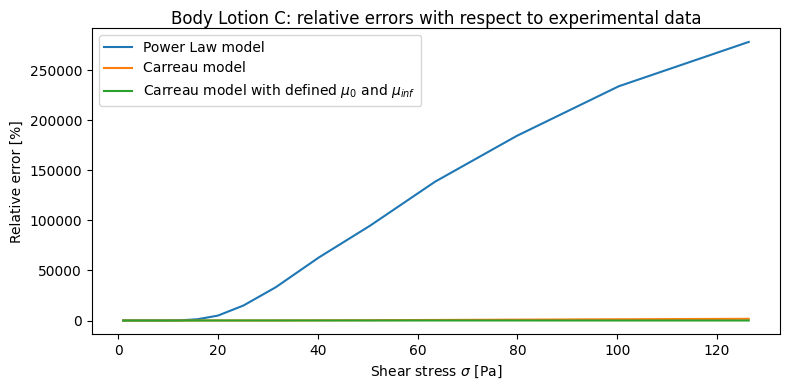

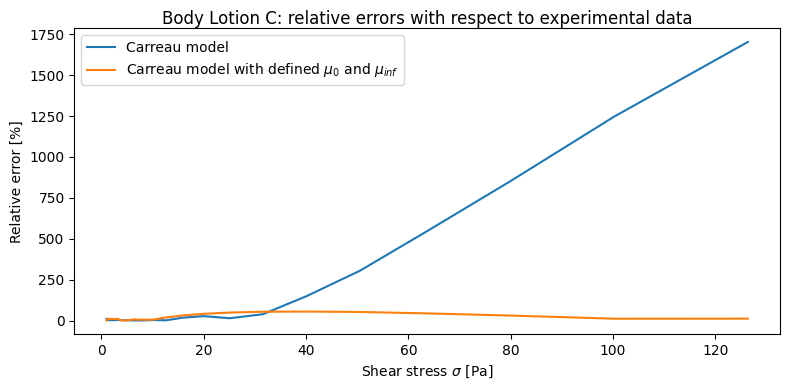

In [129]:
fig,ac = plt.subplots(figsize=(8,4))
ac.plot(xBLC,error_powerlaw,label=r'Power Law model')
ac.plot(xBLC,error_carreau,label=r'Carreau model')
ac.plot(xBLC,error_carreau2,label=r'Carreau model with defined $\mu_0$ and $\mu_{inf}$')
ac.set_xlabel(r'Shear stress $\sigma$ [Pa]')
ac.set_ylabel(r'Relative error [%]')
ac.set_title("Body Lotion C: relative errors with respect to experimental data", va='top')
legend = ac.legend()
fig.tight_layout()

fig,ac = plt.subplots(figsize=(8,4))
ac.plot(xBLC,error_carreau,label=r'Carreau model')
ac.plot(xBLC,error_carreau2,label=r'Carreau model with defined $\mu_0$ and $\mu_{inf}$')
ac.set_xlabel(r'Shear stress $\sigma$ [Pa]')
ac.set_ylabel(r'Relative error [%]')
ac.set_title("Body Lotion C: relative errors with respect to experimental data", va='top')
legend = ac.legend()
fig.tight_layout()